In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api  as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#  a)- Splitting data into training and testing data

In [35]:
df=pd.read_csv('House_Rent_Dataset.csv')

In [40]:
lower_bound=0.1
upper_bound=0.95
result=df['Size'].quantile([lower_bound,upper_bound])
result

0.10     400.0
0.95    2000.0
Name: Size, dtype: float64

In [72]:
outlier=(df['Size']<result.loc[lower_bound]) | (df['Size']>result.loc[upper_bound])
a=df[outlier]
pd.cut(a)
#a=df.drop([outlier], axis=0,inplace=True)
#df[a]

TypeError: cut() missing 1 required positional argument: 'bins'

In [2]:
df.drop([""])
X=df[['Size','BHK','Bathroom','City','Area Type']]
Y=df['Rent']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.2, train_size=0.8, random_state=42 ,shuffle=True, stratify=None)
print("Size(rows) of training data is",len(X_train))
print("Size(rows) of testing data is",len(X_test))
print("Data types of training data(X) are ",X_train.dtypes)
print("                            ")
print("Exploring training data as(X) : ",X_train.describe())
print("Data types of testing data(X) are ",X_test.dtypes)
print("                            ")
print("Exploring testing data as(X) : ",X_test.describe())

Size(rows) of training data is 3796
Size(rows) of testing data is 950
Data types of training data(X) are  Size          int64
BHK           int64
Bathroom      int64
City         object
Area Type    object
dtype: object
                            
Exploring training data as(X) :                Size          BHK     Bathroom
count  3796.000000  3796.000000  3796.000000
mean    967.095627     2.090358     1.968388
std     635.144783     0.838784     0.886468
min      10.000000     1.000000     1.000000
25%     550.000000     2.000000     1.000000
50%     850.000000     2.000000     2.000000
75%    1200.000000     3.000000     2.000000
max    8000.000000     6.000000    10.000000
Data types of testing data(X) are  Size          int64
BHK           int64
Bathroom      int64
City         object
Area Type    object
dtype: object
                            
Exploring testing data as(X) :                Size         BHK    Bathroom
count   950.000000  950.000000  950.000000
mean    969.06947

# b)- Data cleaning

In [3]:
# removing posted and point od conatcts coluns because they are not contributing in predection of rent
new_df=df.drop(['Posted On','Point of Contact','Area Locality','Floor'], axis=1)
new_df

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom
0,2,10000,1100,Super Area,Kolkata,Unfurnished,Bachelors/Family,2
1,2,20000,800,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1
2,2,17000,1000,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1
3,2,10000,800,Super Area,Kolkata,Unfurnished,Bachelors/Family,1
4,2,7500,850,Carpet Area,Kolkata,Unfurnished,Bachelors,1
...,...,...,...,...,...,...,...,...
4741,2,15000,1000,Carpet Area,Hyderabad,Semi-Furnished,Bachelors/Family,2
4742,3,29000,2000,Super Area,Hyderabad,Semi-Furnished,Bachelors/Family,3
4743,3,35000,1750,Carpet Area,Hyderabad,Semi-Furnished,Bachelors/Family,3
4744,3,45000,1500,Carpet Area,Hyderabad,Semi-Furnished,Family,2


In [4]:
print("Misssing values in original data : ")
print(new_df.isnull().sum()) 
print("                                  ")
print("Missing values in training data")        # no  missing values in orginal data and training and testing data
print(X_train.isnull().sum())

Misssing values in original data : 
BHK                  0
Rent                 0
Size                 0
Area Type            0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
dtype: int64
                                  
Missing values in training data
Size         0
BHK          0
Bathroom     0
City         0
Area Type    0
dtype: int64


In [5]:
print("Number of duplicates values", new_df.duplicated().sum())

Number of duplicates values 277


In [6]:
print("Names of coloumns which have categorical data in original data(df) - >")
print(new_df.select_dtypes(include=['object']).columns.tolist())
print("Unique values of area type are : ", new_df['Area Type'].unique())
a = np.array([1])
b = np.array([2])
c = np.array([3])
cleanup = {"Area Type": {'Super Area':a, 'Carpet Area':b, 'Built Area':c}}
new_df['Area Type'] = new_df['Area Type'].astype('str')
new_df.replace(cleanup,inplace=True)
new_df

Names of coloumns which have categorical data in original data(df) - >
['Area Type', 'City', 'Furnishing Status', 'Tenant Preferred']
Unique values of area type are :  ['Super Area' 'Carpet Area' 'Built Area']


,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom
0,2,10000,1100,1,Kolkata,Unfurnished,Bachelors/Family,2
1,2,20000,800,1,Kolkata,Semi-Furnished,Bachelors/Family,1
2,2,17000,1000,1,Kolkata,Semi-Furnished,Bachelors/Family,1
3,2,10000,800,1,Kolkata,Unfurnished,Bachelors/Family,1
4,2,7500,850,2,Kolkata,Unfurnished,Bachelors,1
...,...,...,...,...,...,...,...,...
4741,2,15000,1000,2,Hyderabad,Semi-Furnished,Bachelors/Family,2
4742,3,29000,2000,1,Hyderabad,Semi-Furnished,Bachelors/Family,3
4743,3,35000,1750,2,Hyderabad,Semi-Furnished,Bachelors/Family,3
4744,3,45000,1500,2,Hyderabad,Semi-Furnished,Family,2


# Exploratory Analysis (On training set):

(      Size  BHK  Bathroom       City    Area Type
 1995   950    2         2  Bangalore   Super Area
 1497   800    2         2  Bangalore   Super Area
 2763   545    1         1      Delhi   Super Area
 1351   465    1         1     Mumbai   Super Area
 1862   900    2         2  Bangalore   Super Area
 ...    ...  ...       ...        ...          ...
 4426  1500    3         3  Hyderabad  Carpet Area
 466   1200    3         2    Kolkata   Super Area
 3092   800    2         2    Chennai  Carpet Area
 3772  3500    3         3    Chennai  Carpet Area
 860    450    1         2     Mumbai  Carpet Area
 
 [3796 rows x 5 columns],
 1995    23500
 1497    10500
 2763    19000
 1351    20000
 1862    17000
         ...  
 4426    25000
 466     20000
 3092    20000
 3772    85000
 860     25000
 Name: Rent, Length: 3796, dtype: int64)

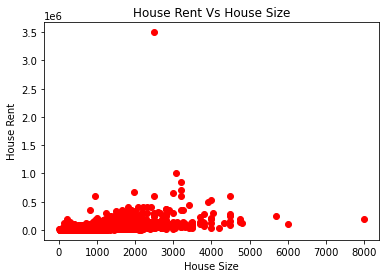

In [7]:
#X_train['Size']
plt.scatter(X_train['Size'],Y_train,color='red')
plt.title("House Rent Vs House Size")       # relationship between size and rent
plt.xlabel("House Size")
plt.ylabel("House Rent")
X_train,Y_train

Text(0, 0.5, 'House Rent')

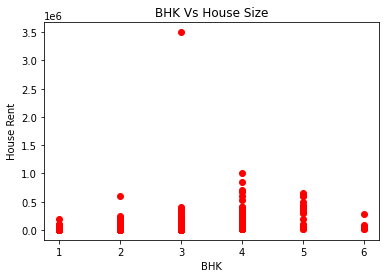

In [8]:
plt.scatter(X_train['BHK'],Y_train,color='red')
plt.title("BHK Vs House Size")       # relationship between BHK and rent
plt.xlabel("BHK")
plt.ylabel("House Rent")

Text(0, 0.5, 'House Rent')

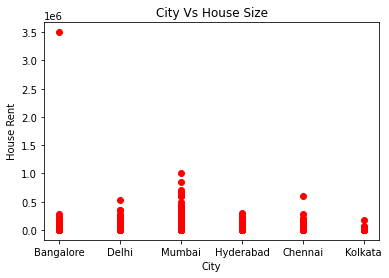

In [9]:
plt.scatter(X_train['City'],Y_train,color='red')
plt.title("City Vs House Size")       # relationship between City and rent
plt.xlabel("City")
plt.ylabel("House Rent")

Text(0, 0.5, 'House Rent')

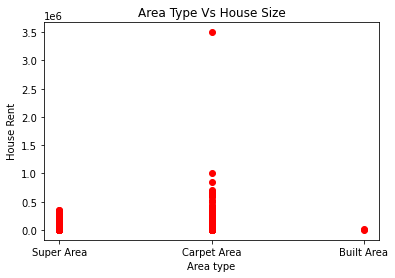

In [10]:
plt.scatter(X_train['Area Type'],Y_train,color='red')
plt.title("Area Type Vs House Size")       # relationship between Area Type and rent
plt.xlabel("Area type")
plt.ylabel("House Rent")

In [28]:
w=new_df.groupby("City")['Rent'].mean().round(decimals=3)
w

City
Bangalore    24966.366
Chennai      21614.092
Delhi        29461.983
Hyderabad    20555.048
Kolkata      11645.174
Mumbai       85321.205
Name: Rent, dtype: float64

Text(0, 0.5, 'Average Rent')

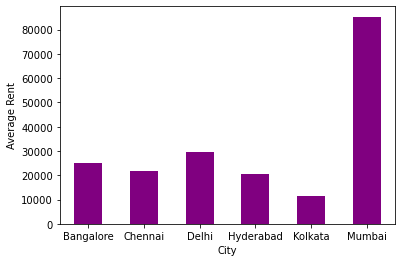

In [12]:
w.plot.bar(rot=0,color='Purple')
plt.xlabel("City")
plt.ylabel("Average Rent")

<AxesSubplot:>

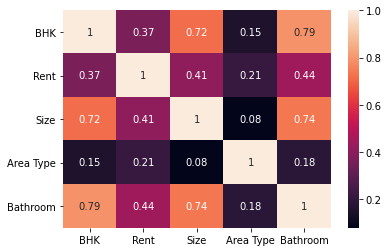

In [13]:
f=new_df.corr()
f
sns.heatmap(f,annot=True,)   # correlation matrix between differnert differenrt columns

#  Regresssion

In [14]:
# with one independent variable only 

a=LinearRegression()
a.fit(X_train[['Size']],Y_train)
Y_pred=a.predict(X_test[['Size']])
s=a.coef_
c=a.intercept_
print("Coefficient is = " ,s)
print("Intercept is  = " ,c) 
mse=mean_squared_error(Y_pred,Y_test)
#print(mse)
rmse=np.sqrt(mse)
print("Root Mean Square valuue is = ",rmse)
pd.DataFrame({'Actual Rent': Y_test, 'Predicted Rent': Y_pred})  # Eqaution of regresssion line is 49.45X-12677


Coefficient is =  [49.45643895]
Intercept is  =  -12677.589503208867
Root Mean Square valuue is =  52161.29135909078


,Actual Rent,Predicted Rent
1566,16000,41724.493344
3159,12000,26887.561658
538,28000,12940.845874
2630,8000,61507.068925
4418,46000,97857.551554
...,...,...
4124,18000,49044.046309
3400,25000,41724.493344
1941,14000,34306.027501
3679,26000,42960.904318


In [15]:
Y_test

1566    16000
3159    12000
538     28000
2630     8000
4418    46000
        ...  
4124    18000
3400    25000
1941    14000
3679    26000
2531    11000
Name: Rent, Length: 950, dtype: int64

Text(0, 0.5, 'House Rent')

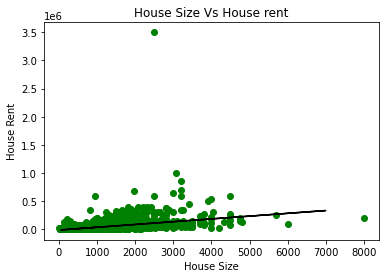

In [16]:
plt.scatter(X_train['Size'], Y_train,color='g') 
plt.plot(X_test['Size'], Y_pred,color='k') 
plt.title("House Size Vs House rent")
plt.xlabel("House Size")
plt.ylabel("House Rent")

In [17]:
# with more than one independent variable
a=LinearRegression()
a.fit(X_train[['Size','BHK','Bathroom']],Y_train)
Y_pred=a.predict(X_test[['Size','BHK','Bathroom']])
s=a.coef_
c=a.intercept_                                # Equation of regresssion line is 21.053x1-269.1315x2+27624.563x3-39022
X_train1=X_train[['Size','BHK','Bathroom']]
coeff=pd.DataFrame(a.coef_,X_train1.columns,columns=['Coefficents'])           
print("Intercept is  = " ,c) 
mse=mean_squared_error(Y_test,Y_pred)
rmse=np.sqrt(mse)
print("Root Mean Square valuue is = ",rmse)
t=pd.DataFrame({'Actual Rent': Y_test, 'Predicted Rent': Y_pred})   
print(coeff)
t
X_test,Y_test

Intercept is  =  -39022.92849685519
Root Mean Square valuue is =  50544.789811069684
           Coefficents
Size         21.053941
BHK        -269.131569
Bathroom  27624.563039


(      Size  BHK  Bathroom       City    Area Type
 1566  1100    2         2  Bangalore   Super Area
 3159   800    2         2    Chennai   Super Area
 538    518    2         2     Mumbai  Carpet Area
 2630  1500    3         3      Delhi  Carpet Area
 4418  2235    3         5  Hyderabad  Carpet Area
 ...    ...  ...       ...        ...          ...
 4124  1248    2         2  Hyderabad  Carpet Area
 3400  1100    3         2    Chennai   Super Area
 1941   950    2         2  Bangalore   Super Area
 3679  1125    3         2    Chennai   Super Area
 2531   500    1         1      Delhi   Super Area
 
 [950 rows x 5 columns],
 1566    16000
 3159    12000
 538     28000
 2630     8000
 4418    46000
         ...  
 4124    18000
 3400    25000
 1941    14000
 3679    26000
 2531    11000
 Name: Rent, Length: 950, dtype: int64)

Text(0, 0.5, 'House Rent')

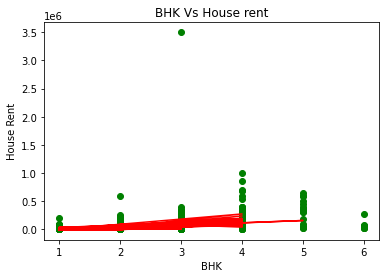

In [18]:
plt.scatter(X_train['BHK'], Y_train,color='g') 
plt.plot(X_test['BHK'], Y_pred,color='red') 
plt.title("BHK Vs House rent")
plt.xlabel("BHK")
plt.ylabel("House Rent")

Text(0, 0.5, 'House Rent')

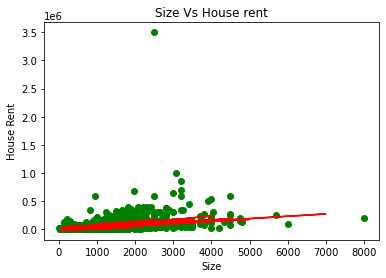

In [19]:
plt.scatter(X_train['Size'], Y_train,color='g') 
plt.plot(X_test['Size'], Y_pred,color='red') 
plt.title("Size Vs House rent")
plt.xlabel("Size")
plt.ylabel("House Rent")

# Logistic Regression

In [31]:
model=LogisticRegression(max_iter=10,solver='liblinear')


Training the data

In [32]:
model.fit(X_train[['Size','BHK','Bathroom']],Y_train)

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LogisticRegression(max_iter=10, solver='liblinear')

Evaluating the model

In [33]:
b=model.predict(X_train[['Size','BHK','Bathroom']])
c=accuracy_score(b,Y_train)
mse=mean_squared_error(Y_test,Y_pred)
#print(mse)
rmse=np.sqrt(mse)
print(rmse)

print("Accuracy score of training model = ",c)   #it shows that out of 100 predictions , only 6% we can predict correctly.

50544.789811069684
Accuracy score of training model =  0.057692307692307696


In [34]:
b=model.predict(X_test[['Size','BHK','Bathroom']])
c=accuracy_score(b,Y_test)
print("Accuracy score of testing  model = ",c)    

Accuracy score of testing  model =  0.05578947368421053


In [24]:
new_df['Purchase'] = [1 if i>9000  else 0 for i in new_df['Rent']]
new_df

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Purchase
0,2,10000,1100,1,Kolkata,Unfurnished,Bachelors/Family,2,1
1,2,20000,800,1,Kolkata,Semi-Furnished,Bachelors/Family,1,1
2,2,17000,1000,1,Kolkata,Semi-Furnished,Bachelors/Family,1,1
3,2,10000,800,1,Kolkata,Unfurnished,Bachelors/Family,1,1
4,2,7500,850,2,Kolkata,Unfurnished,Bachelors,1,0
...,...,...,...,...,...,...,...,...,...
4741,2,15000,1000,2,Hyderabad,Semi-Furnished,Bachelors/Family,2,1
4742,3,29000,2000,1,Hyderabad,Semi-Furnished,Bachelors/Family,3,1
4743,3,35000,1750,2,Hyderabad,Semi-Furnished,Bachelors/Family,3,1
4744,3,45000,1500,2,Hyderabad,Semi-Furnished,Family,2,1
